In [1]:
import os
import SimpleITK as sitk
import numpy as np
import radiomics
import matplotlib.pyplot as plt


In [2]:
from radiomics import featureextractor, getFeatureClasses

In [3]:
extractor=featureextractor.RadiomicsFeatureExtractor()

In [4]:
cwd = os.getcwd()
print(os.listdir(cwd))

['.git', 'radiomique.ipynb', 'README.md']


In [8]:
image1= sitk.ReadImage('data/cerveau.tif')

In [19]:
ar = np.ones((524,524))
mask = np.zeros((526,526))

mask[1:-1, 1:-1] = ar

# Create a mask using the NumPy array and the reference image
mask = sitk.GetImageFromArray(mask)

# Set the mask's properties to match the reference image
mask.SetSpacing(image1.GetSpacing())
mask.SetOrigin(image1.GetOrigin())
mask.SetDirection(image1.GetDirection())

# Ensure the mask has the same data type as the reference image
mask = sitk.Cast(mask, image1.GetPixelID())

In [20]:
label_arr = sitk.GetArrayFromImage(mask)
lena_arr = sitk.GetArrayFromImage(image1)

Text(0.5, 1.0, 'Segmentation #1')

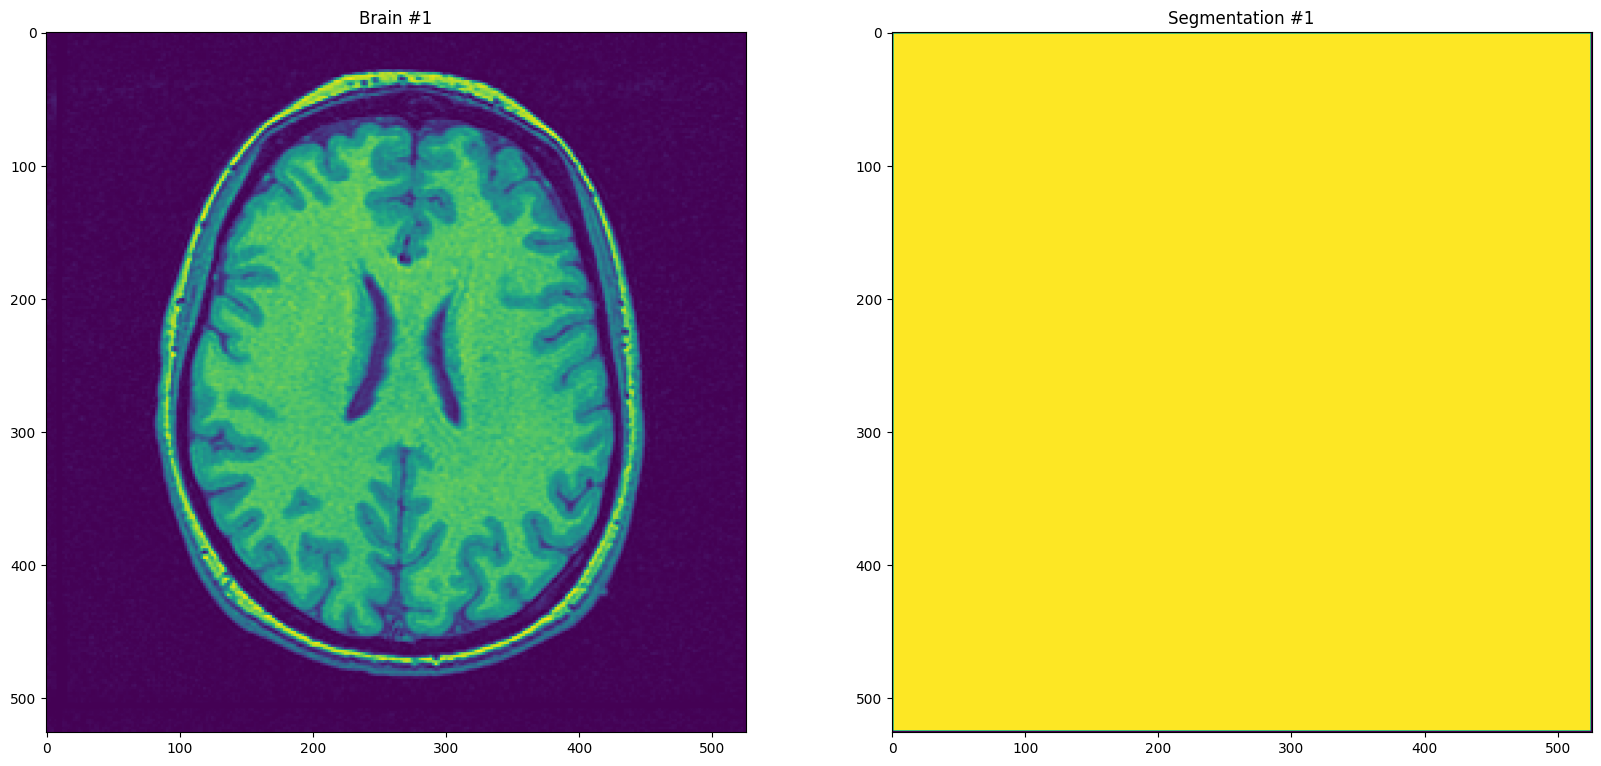

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# First image
plt.subplot(2,2,1)
plt.imshow(lena_arr)
plt.title("Brain #1")
plt.subplot(2,2,2)
plt.imshow(label_arr)
plt.title("Segmentation #1")

In [22]:
featureVector = extractor.execute(image1, mask)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [23]:
for featureName in featureVector.keys():
    print('Computed %s: %s' % (featureName, featureVector[featureName]))

Computed diagnostics_Versions_PyRadiomics: v3.0.1
Computed diagnostics_Versions_Numpy: 1.24.3
Computed diagnostics_Versions_SimpleITK: 2.3.0
Computed diagnostics_Versions_PyWavelet: 1.4.1
Computed diagnostics_Versions_Python: 3.10.11
Computed diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
Computed diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
Computed diagnostics_Image-original_Hash: 3f831eb86d6ce3633032ca8d9ac06866c870a0ae
Computed diagnostics_Image-original_Dimensionality: 2D
Computed diagnostics_Image-original_Spacing: (0.021166666666666667, 0.021166666666666667)
Computed diagnostics_Image-original_Size: (526, 526)
Computed diagnostics_Image-original

In [25]:
feature_vector = featureVector.values()
feature_vector

odict_values(['v3.0.1', '1.24.3', '2.3.0', '1.4.1', '3.10.11', {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}, {'Original': {}}, '3f831eb86d6ce3633032ca8d9ac06866c870a0ae', '2D', (0.021166666666666667, 0.021166666666666667), (526, 526), 66.3423788113172, 0.0, 255.0, 'f7f3381295d076d9f431c3ad7dd1a18249671e42', (0.021166666666666667, 0.021166666666666667), (526, 526), (1, 1, 524, 524), 274576, 1, (262.5, 262.5), (5.55625, 5.55625), array(1.), array(184.), array(2.87686746e+09), array(2.1770602), array(144.), array(1.60763072), array(255.), array(72.18591865), array(66.83490545), array(6.), array(0.), array(255.), array(65.08815687), array(102.35961404), array(0.58880077), array(1288916.53282486), array(0.3